#<center>**Reconhecimento de comando de voz usando SVM**</center>

<b>Autora:</b> Maria Eline Silva de Farias- 516229

<b>Resumo:</b>
  A base de dados, gerada pelo autor é dividida em 3 classes, referentes a 45 sinais de áudio, onde são 15 sinais com a palavra "um"(classe 1), 15 com a palavra "dois" (classe 2) e 15 com a palavra "três" (classe 3). A próxima etapa consiste em realizar a etapa de extração de atributos e em seguida implementar o classificador SVM para classificar a base de dados. Além disso é necessário fazer a otimização (tunning) dos seguintes hiperparâmetros: tipo de função kernel, constante de relaxamento C e do parâmetro kernel scale.

  Para a otimização dos hiperparâmetros, você deverá fazer um grid search testando os seguintes valores:
-Função kernel: linear, RBF e polinomial (grau 1 e 2).
- Constante de relaxamento C: 10-3, 10-2, 10-1, 1, 10, 100
- kernel scale: 10-3, 10-2, 10-1, 1, 10, 100
- Usar a abordagem 1 vs 1 para a classificação multiclasses. Em caso de empate, a escolha da classe pode ser feita de forma aleatória.
- Usar validação cruzada K-fold.
- É permitido usar uma função pronta para o classificador SVM e
para o K-fold.
- O código deve fornecer a acurácia média (taxa de acerto).

<b>Descrição:</b>

Este projeto é realizado para  a disciplina Tópicos Especiais em Telecomunicações I (Reconhecimento de Padrões).

##Importando Bibliotecas

In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import math
from scipy.stats import kurtosis, skew
import scipy as sp
from scipy import signal
from scipy.fft import fft, fftfreq
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import csv
import math
import plotly.express as px
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from scipy.fft import fft

##Carregando a Base de Dados

In [20]:
# carregando dataset inputData
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho05/dados/dados.csv",header=None)

In [21]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 16000 entries, 0 to 15999
dtypes: float64(11504), int64(4496)
memory usage: 5.5 MB


,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.007812,-0.007812
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000


In [22]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [23]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
count,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.000000,45.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000174,-0.000174
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001165,0.001165
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007812,-0.007812
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


##Visualizando as amostras

Text(0.5, 1.0, 'Sinais de Voz com as palavras  um, dois e três')

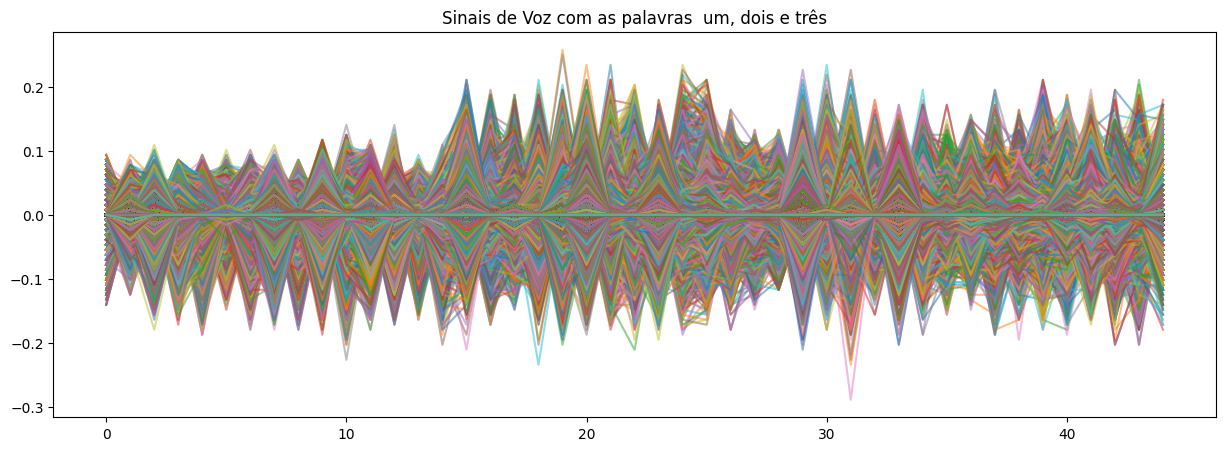

In [24]:
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(df, alpha=0.5)
axes.set_title("Sinais de Voz com as palavras  um, dois e três")

##Extraindo atributos de cada amostra

###transpondo o DataFrame


In [25]:
df = df.T # Transpor o dataframe para ter as colunas como variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16000 non-null  float64
 1   1       16000 non-null  float64
 2   2       16000 non-null  float64
 3   3       16000 non-null  float64
 4   4       16000 non-null  float64
 5   5       16000 non-null  float64
 6   6       16000 non-null  float64
 7   7       16000 non-null  float64
 8   8       16000 non-null  float64
 9   9       16000 non-null  float64
 10  10      16000 non-null  float64
 11  11      16000 non-null  float64
 12  12      16000 non-null  float64
 13  13      16000 non-null  float64
 14  14      16000 non-null  float64
 15  15      16000 non-null  float64
 16  16      16000 non-null  float64
 17  17      16000 non-null  float64
 18  18      16000 non-null  float64
 19  19      16000 non-null  float64
 20  20      16000 non-null  float64
 21  21      16000 non-null  float64
 22

In [26]:
features = pd.DataFrame()

## TIME DOMAIN ##
for column in df:
    features['Max'] = df.max(axis=0)
    features['Mean'] = df.mean(axis=0)
    features['Rms'] = np.sqrt(np.mean(df**2)) # raiz quadrada média
    features['Var'] = np.var(df)              # variancia
    features['Std'] = np.std(df)              # desvio padrão
    features['Peak'] = np.max(np.abs(df))     # Pico
    features['P2p'] = np.ptp(df)              # Intervalo de valores
    features['Skew'] = stats.skew(df)         # assimetria

    ## FREQ DOMAIN ##
    ft = fft(df)
    S = np.abs(ft**2)/len(df)
    features['Modulo_Fourier'] = np.mean(np.abs(ft), axis=0)   # Adicione o atributo do módulo da transformada de Fourier ao DataFrame
features.head(10)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:278: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:279: Fu

,Max,Mean,Rms,Var,Std,Peak,P2p,Skew,Modulo_Fourier
0,0.093750,-0.000039,0.017169,0.000295,0.017169,0.14062,0.234370,-1.175324,0.079644
1,0.093750,-0.000035,0.013102,0.000172,0.013101,0.12500,0.218750,-1.127430,0.089463
2,0.109380,-0.000076,0.018826,0.000354,0.018826,0.17969,0.289070,-1.651408,0.086015
3,0.085938,-0.000022,0.014529,0.000211,0.014529,0.17188,0.257818,-2.285199,0.088234
4,0.093750,-0.000077,0.019318,0.000373,0.019318,0.18750,0.281250,-2.072911,0.086799
5,0.101560,-0.000029,0.014326,0.000205,0.014326,0.14844,0.250000,-1.375863,0.085297
6,0.101560,-0.000077,0.019964,0.000399,0.019964,0.17969,0.281250,-1.721187,0.084923
7,0.109380,-0.000083,0.017947,0.000322,0.017947,0.17969,0.289070,-2.251210,0.087181
8,0.085938,-0.000055,0.017399,0.000303,0.017399,0.17969,0.265628,-1.997621,0.092644
9,0.117190,-0.000030,0.021364,0.000456,0.021364,0.18750,0.304690,-1.247884,0.091198


In [27]:
features.info()
print(features.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Max             45 non-null     float64
 1   Mean            45 non-null     float64
 2   Rms             45 non-null     float64
 3   Var             45 non-null     float64
 4   Std             45 non-null     float64
 5   Peak            45 non-null     float64
 6   P2p             45 non-null     float64
 7   Skew            45 non-null     float64
 8   Modulo_Fourier  45 non-null     float64
dtypes: float64(9)
memory usage: 3.5 KB
(45, 9)


##Normalizando as features
O método z-score transforma as informações em distribuição com uma média 0 e um desvio típico de 1.

In [28]:
dataset_features_normalizadas = features.copy()
for column in dataset_features_normalizadas.columns:
    dataset_features_normalizadas[column] = (dataset_features_normalizadas[column] -
                           dataset_features_normalizadas[column].mean()) / dataset_features_normalizadas[column].std()
display(dataset_features_normalizadas)

,Max,Mean,Rms,Var,Std,Peak,P2p,Skew,Modulo_Fourier
0,-1.439851,-0.573157,-1.219820,-1.212284,-1.219816,-1.645393,-1.674354,-0.824743,-2.996492
1,-1.439851,-0.450848,-2.340234,-2.021050,-2.340225,-2.127551,-1.902936,-0.778839,1.091014
2,-1.129738,-1.750431,-0.763187,-0.820354,-0.763216,-0.439382,-0.873878,-1.281042,-0.344152
3,-1.594848,-0.053292,-1.946985,-1.761933,-1.946969,-0.680460,-1.331218,-1.888496,0.579436
4,-1.439851,-1.765593,-0.627676,-0.697090,-0.627705,-0.198303,-0.988316,-1.685030,-0.017856
5,-1.284894,-0.282710,-2.002881,-1.800398,-2.002869,-1.404006,-1.445626,-1.016948,-0.643329
6,-1.284894,-1.780877,-0.449701,-0.530370,-0.449730,-0.439382,-0.988316,-1.347922,-0.798789
7,-1.129738,-1.949073,-1.005322,-1.032696,-1.005359,-0.439382,-0.873878,-1.855919,0.141234
8,-1.594848,-1.092981,-1.156402,-1.160017,-1.156411,-0.439382,-1.216927,-1.612868,2.415198
9,-0.974781,-0.298127,-0.064249,-0.150459,-0.064244,-0.198303,-0.645296,-0.894287,1.813266


## Atribuindo os rótulos para as classe e Salvando o dataFrame com as features em um arquivo csv

In [29]:
# Usando DataFrame.insert() para adicionar uma coluna
dataset_features_normalizadas.insert(9, "Classe", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                               2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                               3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], True)
# Convert "Classe" column to categorical type
dataset_features_normalizadas["Classe"] = dataset_features_normalizadas["Classe"].astype("category")

In [30]:
dataset_features_normalizadas.tail(5)

,Max,Mean,Rms,Var,Std,Peak,P2p,Skew,Modulo_Fourier,Classe
40,0.420232,1.567280,0.355886,0.292898,0.355889,-0.198303,0.383615,0.633201,-0.643329,3
41,0.575189,1.414254,1.959978,2.266737,1.959974,0.042776,0.269324,0.467862,-0.017856,3
42,0.575189,0.726271,0.586128,0.548834,0.586135,0.283855,0.726488,0.115836,0.579436,3
43,0.885302,1.154410,0.537664,0.494199,0.537670,0.525242,0.955216,0.563565,-0.344152,3
44,0.265274,0.619277,0.617920,0.584895,0.617927,-0.439382,0.155033,0.978321,1.091014,3


In [31]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/trabalho05/dados', exist_ok=True)
dataset_features_normalizadas.to_csv('/content/drive/MyDrive/Colab Notebooks/trabalho05/dados/Data_Sinal_Voz_Features.csv')

##Matriz de Covariancia

<ipython-input-32-22e9bf160c43>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= dataset_features_normalizadas.corr()


<Axes: >

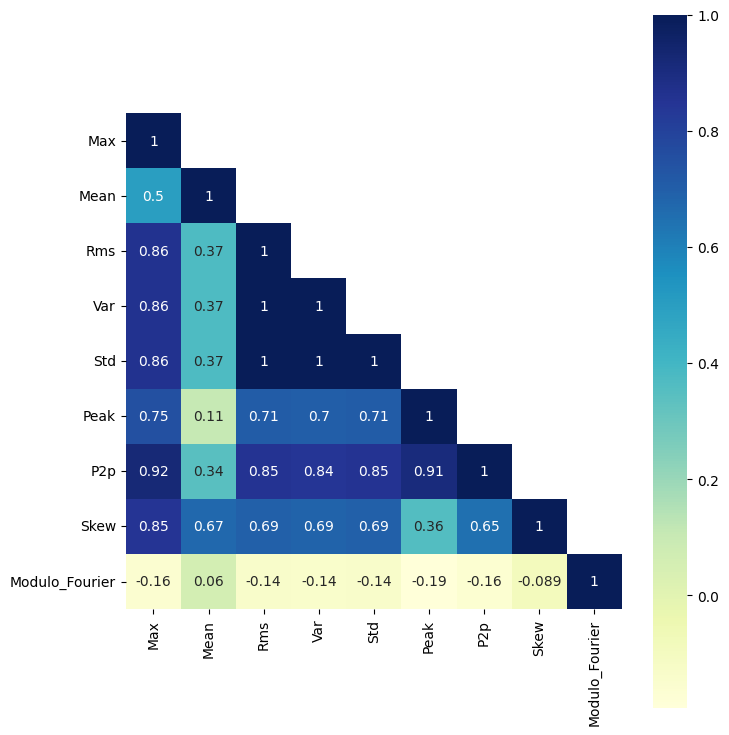

In [32]:
correlation= dataset_features_normalizadas.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(8,9)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

##Classificador SVM (Support Vector Machine)

1- mbaralhar os dados usando a função shuffle para garantir uma distribuição aleatória nos folds da validação cruzada.

2- Criar o classificador SVM com kernel linear usando SVC(kernel='linear').

3- Em seguida, criamos o classificador OneVsOne usando OneVsOneClassifier(svm).

4- Finalmente, usamos a função cross_val_score para calcular a acurácia média usando validação cruzada k-fold com cv=k. A acurácia de cada fold é armazenada na lista scores, e então calculamos a média usando scores.mean().

 *Accuracy :  80,5%*


In [33]:
# Carregando os dados do arquivo CSV
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trabalho05/dados/Data_Sinal_Voz_Features.csv')
df2.head(2)

,Unnamed: 0,Max,Mean,Rms,Var,Std,Peak,P2p,Skew,Modulo_Fourier,Classe
0,0,-1.439851,-0.573157,-1.219820,-1.212284,-1.219816,-1.645393,-1.674354,-0.824743,-2.996492,1
1,1,-1.439851,-0.450848,-2.340234,-2.021050,-2.340225,-2.127551,-1.902936,-0.778839,1.091014,1


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      45 non-null     int64  
 1   Max             45 non-null     float64
 2   Mean            45 non-null     float64
 3   Rms             45 non-null     float64
 4   Var             45 non-null     float64
 5   Std             45 non-null     float64
 6   Peak            45 non-null     float64
 7   P2p             45 non-null     float64
 8   Skew            45 non-null     float64
 9   Modulo_Fourier  45 non-null     float64
 10  Classe          45 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 4.0 KB


In [39]:
# Dividir os dados em features (X) e target (y)
X = df2.iloc[:, 1:-1]  # Excluir a primeira coluna (Unnamed: 0) e a última coluna (Classe)
y = df2['Classe']

# Converter as classes em números usando LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Definir os valores possíveis para cada hiperparâmetro
kernels = ['linear', 'rbf', 'poly'] # Os kernels 'linear' e 'rbf' não têm o parâmetro de grau, portanto, não faz diferença definir o grau como 0 para esses kernels.
C_values = [10**(-3), 10**(-2), 10**(-1), 1, 10, 100]
gamma_values = [10**(-3), 10**(-2), 10**(-1), 1, 10, 100]

melhor_acuracia = 0
melhores_parametros = {}

# Loop através de todas as combinações de hiperparâmetros
for kernel in kernels:
    if kernel == 'poly':
        degrees = [1, 2]  # Testar os graus 1 e 2 para o kernel polinomial
    else:
        degrees = [0]  # Definir grau 0 para os outros kernels

    for degree in degrees:
        for C in C_values:
            for gamma in gamma_values:
                acuracia_scores = []

                # Criar o objeto StratifiedKFold para realizar a validação cruzada
                kfold = StratifiedKFold(n_splits=10)

                # Loop através das dobras de validação cruzada
                for train_index, test_index in kfold.split(X, y):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y[train_index], y[test_index]

                    # Criar o classificador SVM com os hiperparâmetros atuais
                    svm = SVC(kernel=kernel, degree=degree, C=C, gamma=gamma)

                    # Treinar o classificador SVM
                    svm.fit(X_train, y_train)

                    # Avaliar a acurácia no conjunto de teste
                    acuracia = svm.score(X_test, y_test)
                    acuracia_scores.append(acuracia)

                # Calcular a acurácia média para os hiperparâmetros atuais
                mean_acuracia = (sum(acuracia_scores) / len(acuracia_scores))*100

                # Imprimir a acurácia para os hiperparâmetros atuais
                print("Acurácia para hiperparâmetros (kernel={}, degree={}, C={}, gamma={}): {:.2f}%".format(kernel, degree, C, gamma, mean_acuracia))

                # Verificar se a acurácia média é a melhor até agora
                if mean_acuracia > melhor_acuracia:
                    melhor_acuracia = mean_acuracia
                    melhores_parametros = {'kernel': kernel, 'degree': degree, 'C': C, 'gamma': gamma}

print("Melhores hiperparâmetros:", melhores_parametros)
print("Melhor acurácia média:", melhor_acuracia)


Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.001, gamma=0.001): 32.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.001, gamma=0.01): 32.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.001, gamma=0.1): 32.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.001, gamma=1): 32.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.001, gamma=10): 32.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.001, gamma=100): 32.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.01, gamma=0.001): 52.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.01, gamma=0.01): 52.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.01, gamma=0.1): 52.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.01, gamma=1): 52.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.01, gamma=10): 52.50%
Acurácia para hiperparâmetros (kernel=linear, degree=0, C=0.01, gamma=100): 52.50